In [1]:
from airbnb_analysis_service import AirbnbAnalysisService
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

[]


In [ ]:
if __name__ == "__main__":

    # create service class
    airbnbAnalysis = AirbnbAnalysisService()

    # get all tables in form of a list
    listings = airbnbAnalysis.get_listings()

listings_df = pd.DataFrame(listings)

In [4]:
df = pd.read_csv("datasets/listings_detailed.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3396 non-null   int64  
 1   listing_url                                   3396 non-null   object 
 2   scrape_id                                     3396 non-null   int64  
 3   last_scraped                                  3396 non-null   object 
 4   source                                        3396 non-null   object 
 5   name                                          3396 non-null   object 
 6   description                                   3286 non-null   object 
 7   neighborhood_overview                         1345 non-null   object 
 8   picture_url                                   3396 non-null   object 
 9   host_id                                       3396 non-null   i

In [ ]:
df = pd.read_csv(
    "listings_2.csv",
    sep=";",
    encoding="latin1",
    on_bad_lines='skip',
    engine="python"
)

In [59]:
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

1. id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy

In [35]:
columns_to_drop = [
    "listing_url", "scrape_id", "last_scraped", "source",
    "picture_url", "host_url", "host_location", "host_about",
    "host_thumbnail_url", "host_picture_url", "bathrooms_text",
    "amenities", "minimum_minimum_nights", "maximum_minimum_nights",
    "minimum_maximum_nights", "maximum_maximum_nights",
    "minimum_nights_avg_ntm", "maximum_nights_avg_ntm",
    "calendar_updated", "calendar_last_scraped",
    "number_of_reviews_ltm", "number_of_reviews_l30d",
    "first_review", "last_review"
]

df = df.drop(columns=columns_to_drop, errors="ignore")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3396 non-null   int64  
 1   name                                          3396 non-null   object 
 2   description                                   3286 non-null   object 
 3   neighborhood_overview                         1345 non-null   object 
 4   host_id                                       3396 non-null   int64  
 5   host_name                                     3396 non-null   object 
 6   host_since                                    3396 non-null   object 
 7   host_response_time                            2550 non-null   object 
 8   host_response_rate                            2550 non-null   object 
 9   host_acceptance_rate                          2872 non-null   o

In [36]:
df["price"] = df["price"].replace({'\$': '', ',': ''}, regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\basil\AppData\Local\Temp\ipykernel_26832\2549404076.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [62]:
print(df.columns.tolist())

['id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,

In [38]:
print(df.head())

       id                                               name  \
0   73282                              Clean, central, quiet   
1  143821                LOFT on 2 floors in Sihlcity Zürich   
2  178448                       a lovely place, top location   
3  227039   *Luxury Penthouse in the heart of trendy Zurich*   
4  251204  Lovely apartment in the middle of trendy Wipki...   

                                         description  \
0                                  Arty neighborhood   
1  EXPERIENCE AN UNUSAL STAY IN THE MIDDLE OF ZUR...   
2  Very central location, 5 min walk from Bahnhof...   
3  Modern and unique penthouse apartment over thr...   
4  The renovated 3 1/2 room apartment is located ...   

                               neighborhood_overview  host_id host_name  \
0                                                NaN   377532    Simona   
1                                                NaN   697307     Erhan   
2  We live in one of the top locations of Zürich,... 

In [39]:
df.describe()
df.describe(include='object')

,name,description,neighborhood_overview,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,has_availability,instant_bookable
count,3396,3286,1345,3396,3396,2550,2550,2872,3265,30,3396,3396,3396,1345,3396,3396,3396,3396,3300,3396
unique,3247,2860,905,1174,1478,4,44,94,2,24,6,2,2,8,34,12,34,4,1,2
top,"Blueground | Wiedikon, storage & w/d, nr market",Please ask BEFORE BOOKING in case you need a f...,"Wiedikon is Zurich's third district, and has a...",Blueground,2021-12-01,within an hour,100%,100%,f,Jacumã,"['email', 'phone']",t,t,"Zürich, Switzerland",Sihlfeld,Kreis 3,Entire rental unit,Entire home/apt,t,f
freq,19,75,64,165,165,1748,1930,874,2455,3,2304,3289,3205,1224,260,484,2265,2598,3300,2243


In [40]:

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3396 non-null   int64  
 1   name                                          3396 non-null   object 
 2   description                                   3286 non-null   object 
 3   neighborhood_overview                         1345 non-null   object 
 4   host_id                                       3396 non-null   int64  
 5   host_name                                     3396 non-null   object 
 6   host_since                                    3396 non-null   object 
 7   host_response_time                            2550 non-null   object 
 8   host_response_rate                            2550 non-null   object 
 9   host_acceptance_rate                          2872 non-null   o

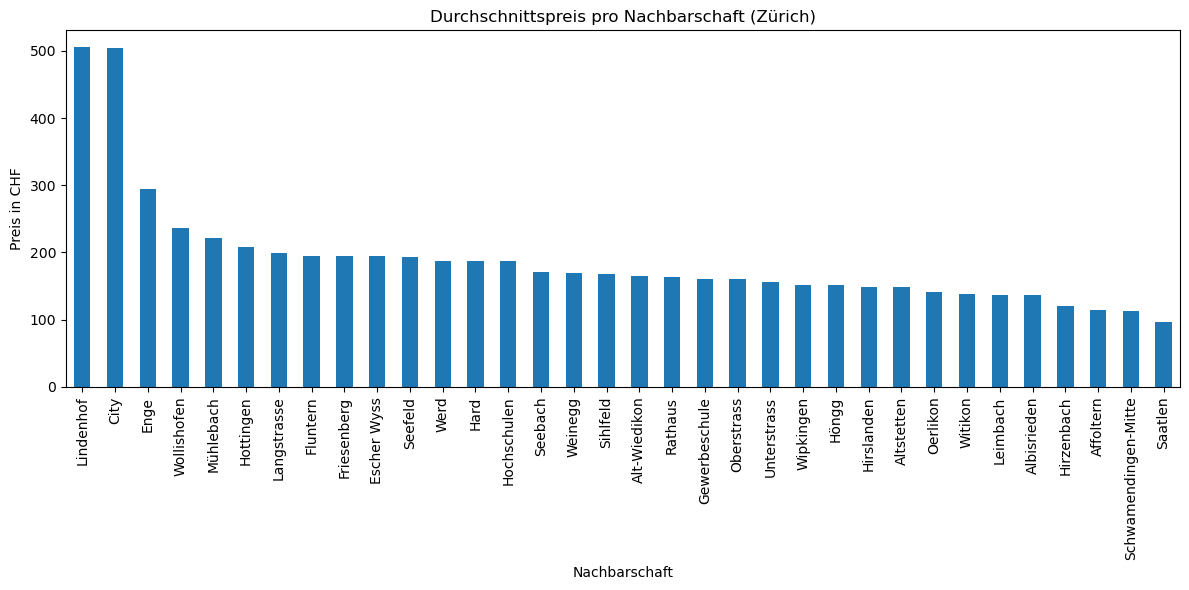

In [12]:
# Gesamtdurchschnitt
durchschnittspreis = df["price"].mean()

# Durchschnittspreis pro Nachbarschaft
preis_pro_neighbourhood = df.groupby("neighbourhood_cleansed")["price"].mean().sort_values(ascending=False)

preis_pro_neighbourhood.plot(kind="bar", figsize=(12,6), title="Durchschnittspreis pro Nachbarschaft (Zürich)")
plt.ylabel("Preis in CHF")
plt.xlabel("Nachbarschaft")
plt.tight_layout()
plt.show()

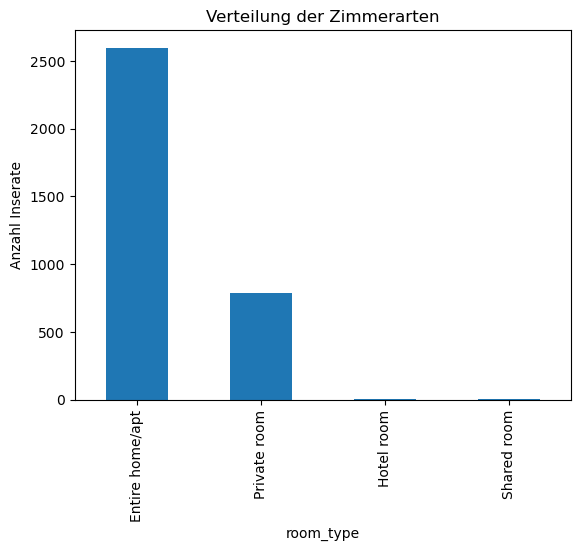

In [13]:
room_counts = df["room_type"].value_counts()
room_counts.plot(kind="bar", title="Verteilung der Zimmerarten")
plt.ylabel("Anzahl Inserate")
plt.show()

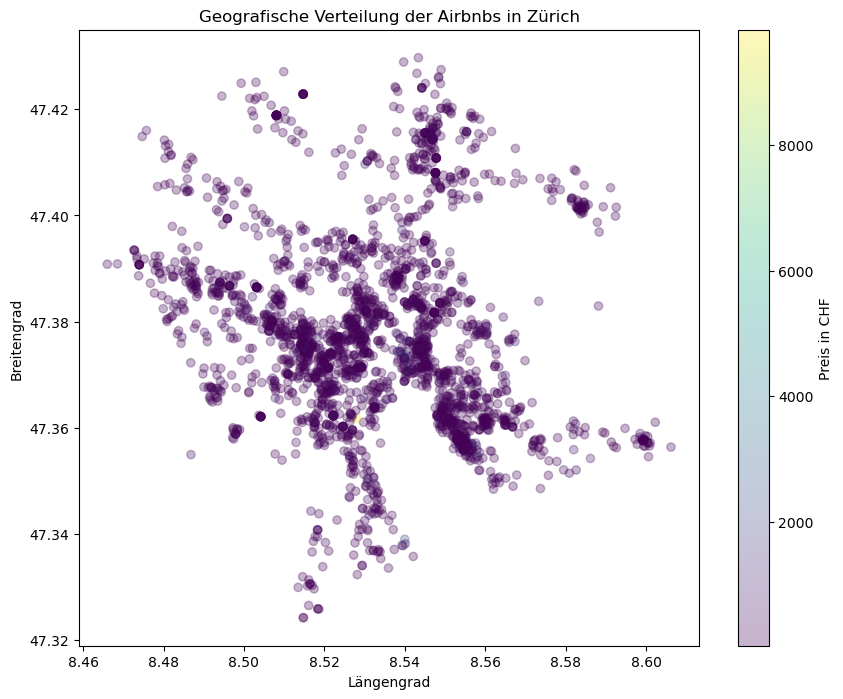

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(df["longitude"], df["latitude"], alpha=0.3, c=df["price"], cmap="viridis")
plt.colorbar(label="Preis in CHF")
plt.title("Geografische Verteilung der Airbnbs in Zürich")
plt.xlabel("Längengrad")
plt.ylabel("Breitengrad")
plt.show()

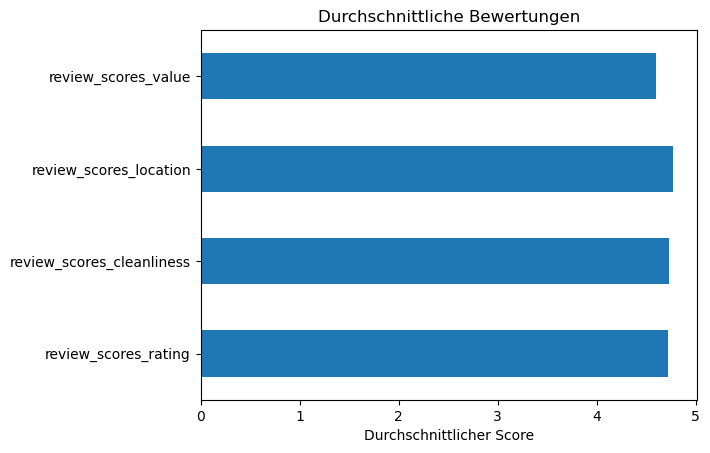

In [15]:
review_avg = df[["review_scores_rating", "review_scores_cleanliness", 
                 "review_scores_location", "review_scores_value"]].mean()

review_avg.plot(kind="barh", title="Durchschnittliche Bewertungen")
plt.xlabel("Durchschnittlicher Score")
plt.show()

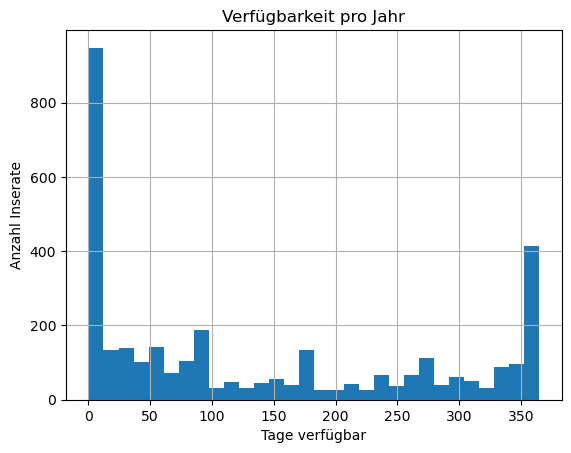

In [16]:
df["availability_365"].hist(bins=30)
plt.title("Verfügbarkeit pro Jahr")
plt.xlabel("Tage verfügbar")
plt.ylabel("Anzahl Inserate")
plt.show()


In [26]:
df["price"] = df["price"].replace({'\$': '', ',': ''}, regex=True)
df["price"] = pd.to_numeric(df["price"], errors="coerce")

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\basil\AppData\Local\Temp\ipykernel_26832\677419712.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace({'\$': '', ',': ''}, regex=True)


price                   1.000000
accommodates            0.224364
bedrooms                0.221706
bathrooms               0.217004
beds                    0.186721
availability_365        0.069319
review_scores_rating    0.062948
Name: price, dtype: float64


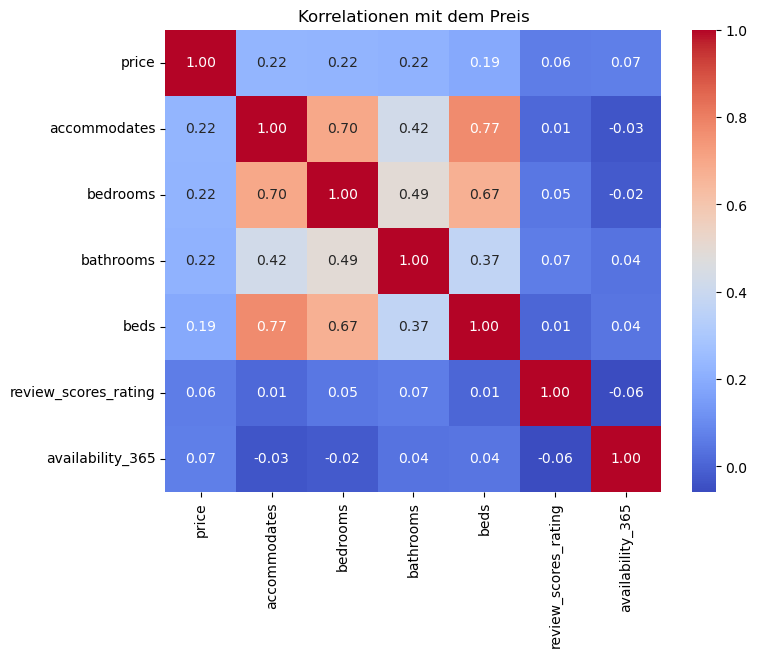

In [27]:
# Auswahl relevanter numerischer Merkmale
features = ["price", "accommodates", "bedrooms", "bathrooms", "beds", 
            "review_scores_rating", "availability_365"]

# Subset & Dropping NA
df_subset = df[features].dropna()

# Korrelationen
correlation = df_subset.corr()["price"].sort_values(ascending=False)
print(correlation)

# Heatmap anzeigen
plt.figure(figsize=(8, 6))
sns.heatmap(df_subset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationen mit dem Preis")
plt.show()


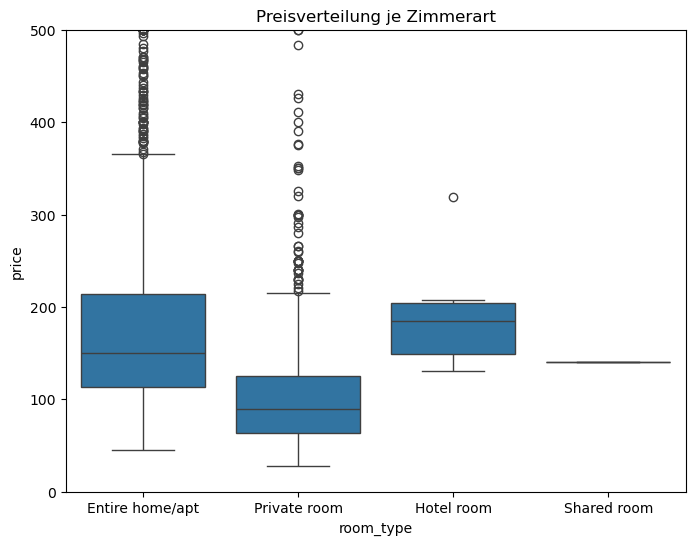

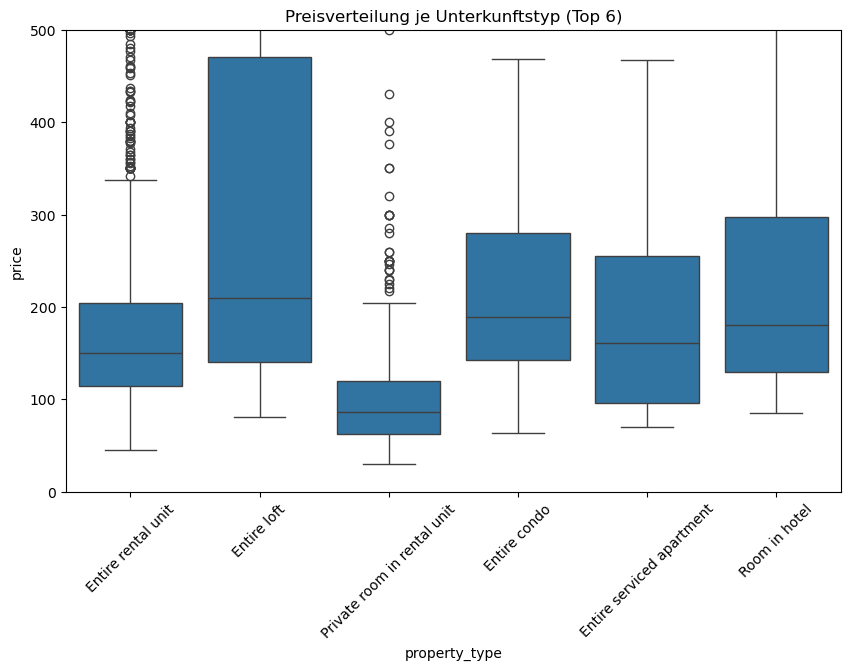

In [41]:
# Boxplot für Zimmerart
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="room_type", y="price")
plt.ylim(0, 500)  # Maxpreis begrenzen für Lesbarkeit
plt.title("Preisverteilung je Zimmerart")
plt.show()

# Boxplot für Property Type
top_types = df["property_type"].value_counts().nlargest(6).index
df_filtered = df[df["property_type"].isin(top_types)]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_filtered, x="property_type", y="price")
plt.ylim(0, 500)
plt.title("Preisverteilung je Unterkunftstyp (Top 6)")
plt.xticks(rotation=45)
plt.show()

In [42]:
# Nur numerische Merkmale
X = df_subset.drop("price", axis=1)
y = df_subset["price"]

# Datensatz splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Koeffizienten anzeigen
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

# R^2 Score
print(f"Modellgüte (R²): {model.score(X_test, y_test):.2f}")

accommodates: 17.70
bedrooms: 27.08
bathrooms: 95.28
beds: -0.40
review_scores_rating: 29.43
availability_365: 0.16
Modellgüte (R²): 0.21


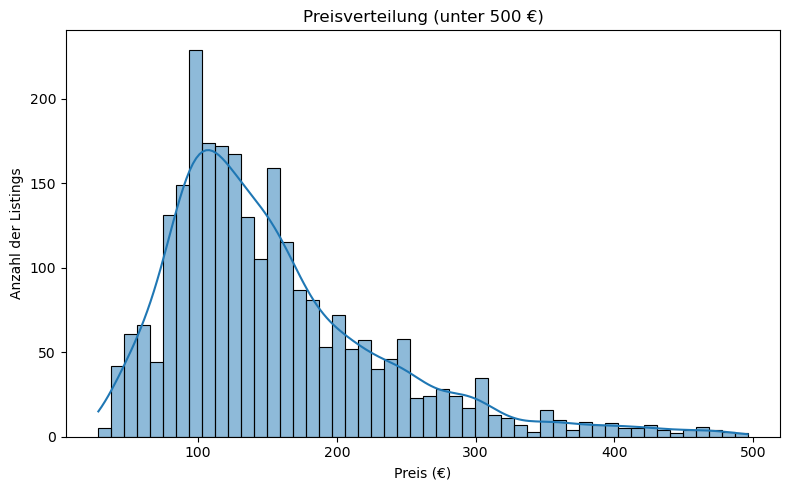

In [43]:
# Plot 1: Preisverteilung (Histogramm, Outlier cut bei 500)
plt.figure(figsize=(8, 5))
sns.histplot(df[df["price"] < 500]["price"].dropna(), bins=50, kde=True)
plt.title("Preisverteilung (unter 500 €)")
plt.xlabel("Preis (€)")
plt.ylabel("Anzahl der Listings")
plt.tight_layout()
plt.show()

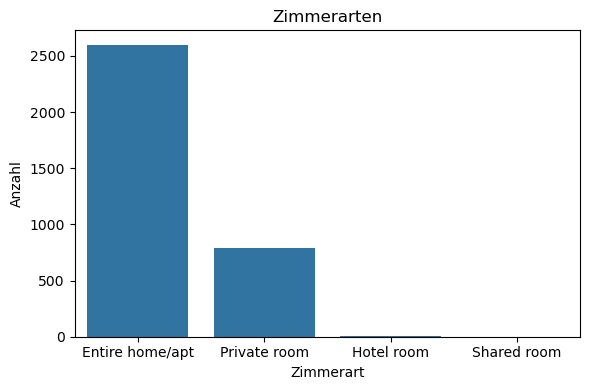

In [44]:
# Plot 2: Verteilung der Zimmerarten
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="room_type", order=df["room_type"].value_counts().index)
plt.title("Zimmerarten")
plt.xlabel("Zimmerart")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

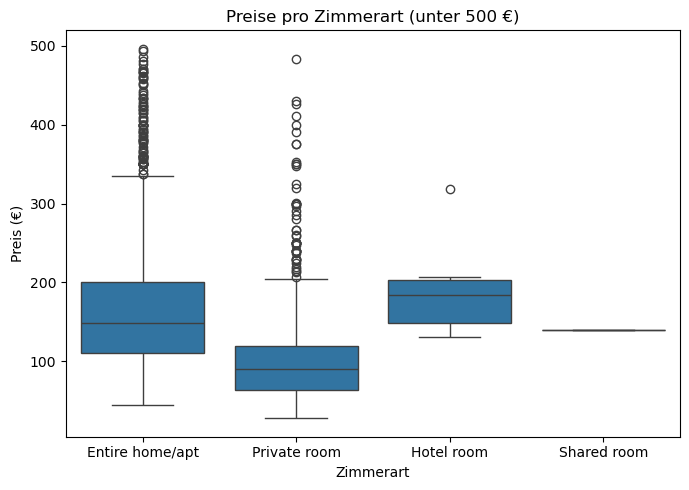

In [45]:
# Plot 3: Boxplot Preis pro Zimmerart
plt.figure(figsize=(7, 5))
sns.boxplot(data=df[df["price"] < 500], x="room_type", y="price")
plt.title("Preise pro Zimmerart (unter 500 €)")
plt.xlabel("Zimmerart")
plt.ylabel("Preis (€)")
plt.tight_layout()
plt.show()

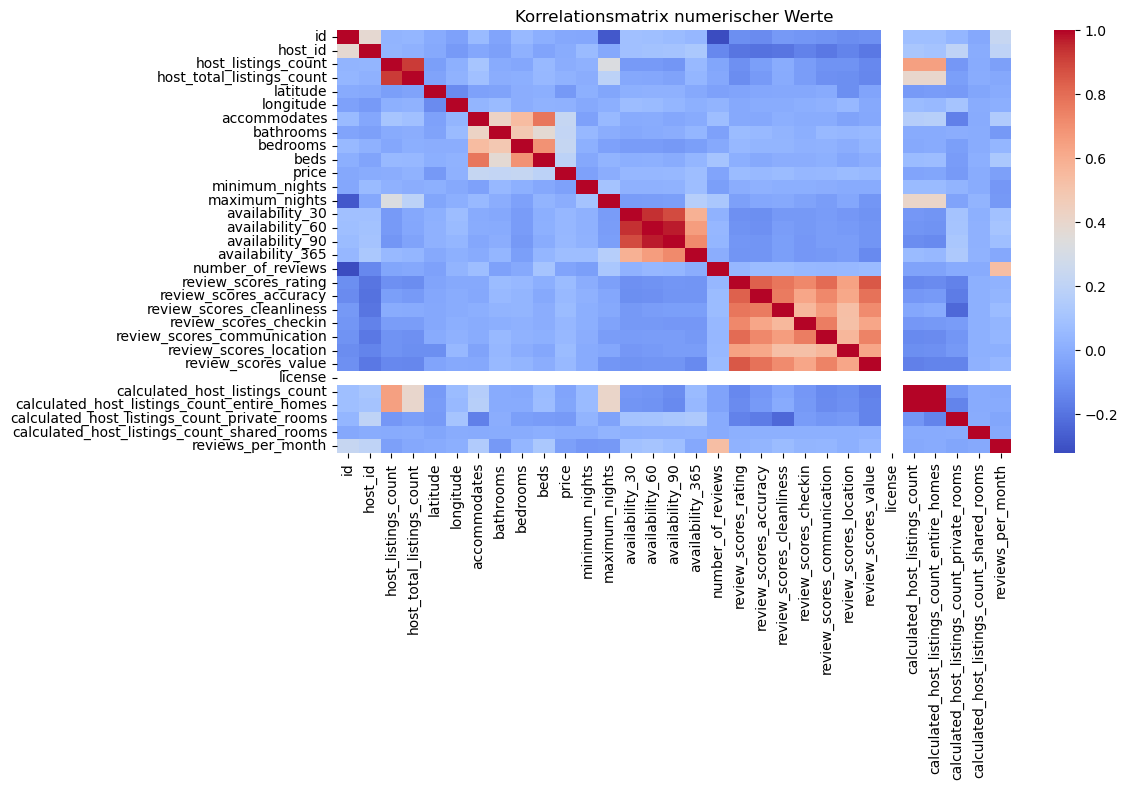

In [46]:
# Plot 4: Korrelations-Heatmap
numerics = df.select_dtypes(include=["float64", "int64"])
corr = numerics.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Korrelationsmatrix numerischer Werte")
plt.tight_layout()
plt.show()

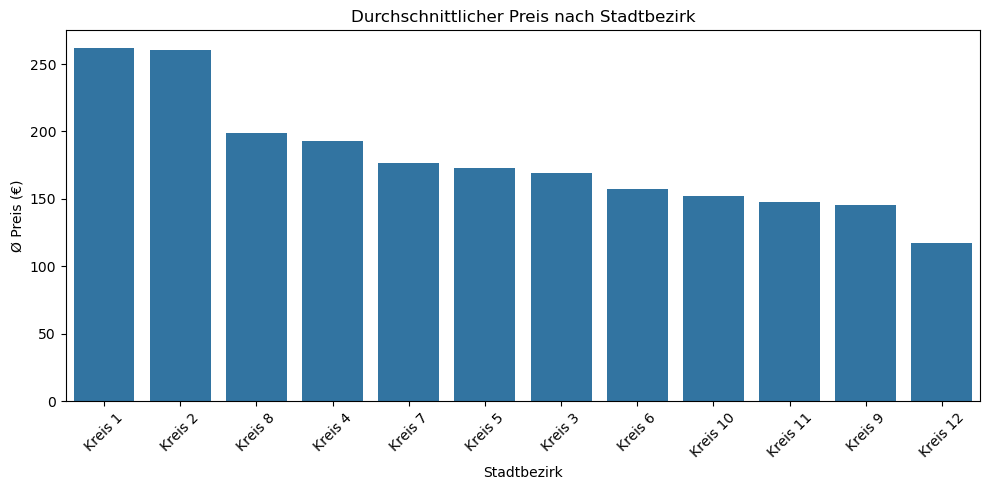

In [47]:
# Plot 5: Durchschnittspreis pro Stadtbezirk (wenn vorhanden)
if "neighbourhood_group_cleansed" in df.columns:
    avg_price_by_neighbourhood = df.groupby("neighbourhood_group_cleansed")["price"].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=avg_price_by_neighbourhood.index, y=avg_price_by_neighbourhood.values)
    plt.title("Durchschnittlicher Preis nach Stadtbezirk")
    plt.xlabel("Stadtbezirk")
    plt.ylabel("Ø Preis (€)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

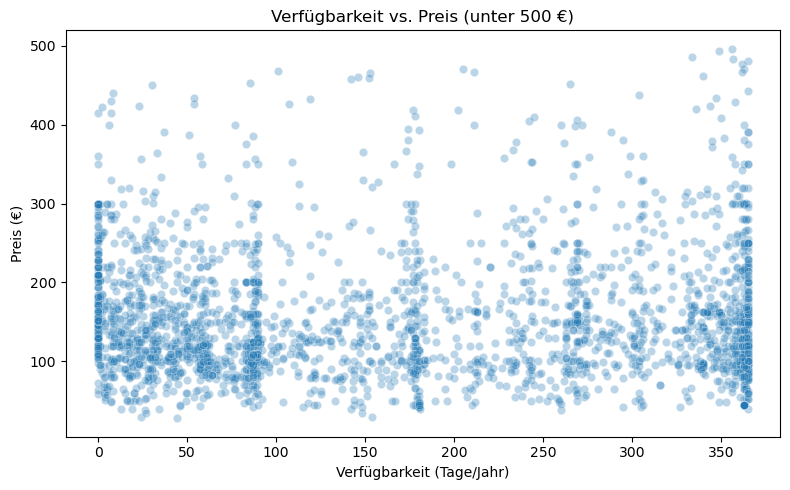

In [ ]:
# Plot 6: Verfügbarkeit vs. Preis (scatter)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df[df["price"] < 500], x="availability_365", y="price", alpha=0.3)
plt.title("Verfügbarkeit vs. Preis (unter 500 €)")
plt.xlabel("Verfügbarkeit (Tage/Jahr)")
plt.ylabel("Preis (€)")
plt.tight_layout()
plt.show()

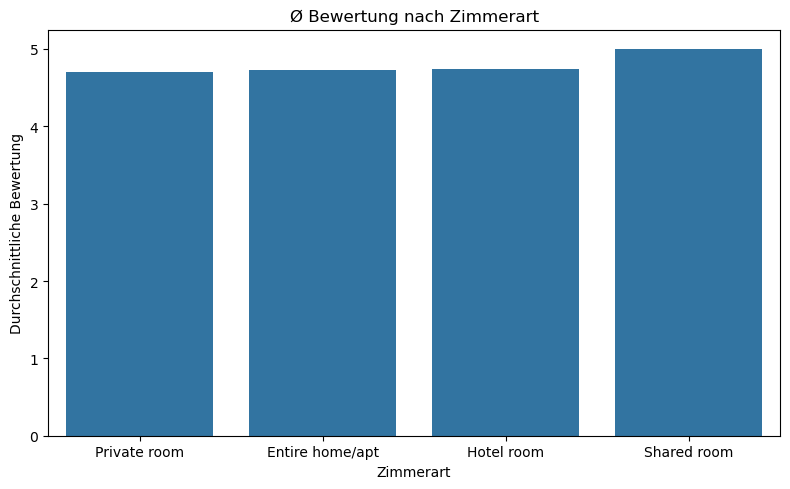

In [50]:
plt.figure(figsize=(8, 5))
mean_scores = df.groupby('room_type')['review_scores_rating'].mean().sort_values()
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title("Ø Bewertung nach Zimmerart")
plt.ylabel("Durchschnittliche Bewertung")
plt.xlabel("Zimmerart")
plt.tight_layout()
plt.show()

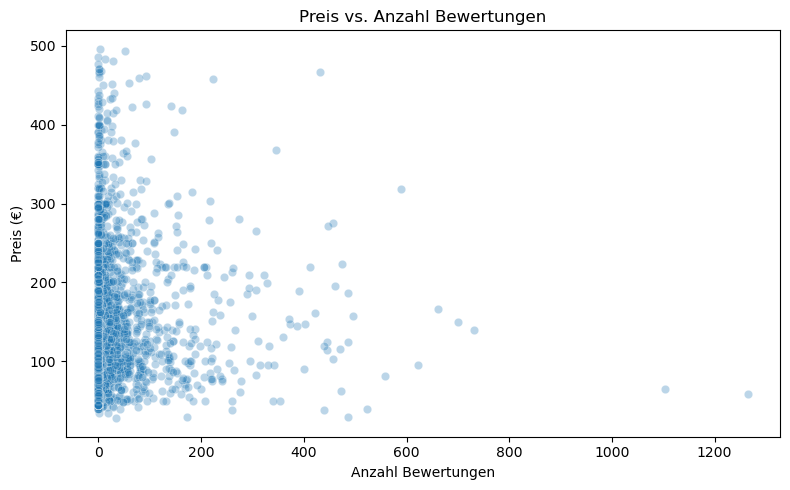

In [51]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df[df["price"] < 500], x="number_of_reviews", y="price", alpha=0.3)
plt.title("Preis vs. Anzahl Bewertungen")
plt.xlabel("Anzahl Bewertungen")
plt.ylabel("Preis (€)")
plt.tight_layout()
plt.show()

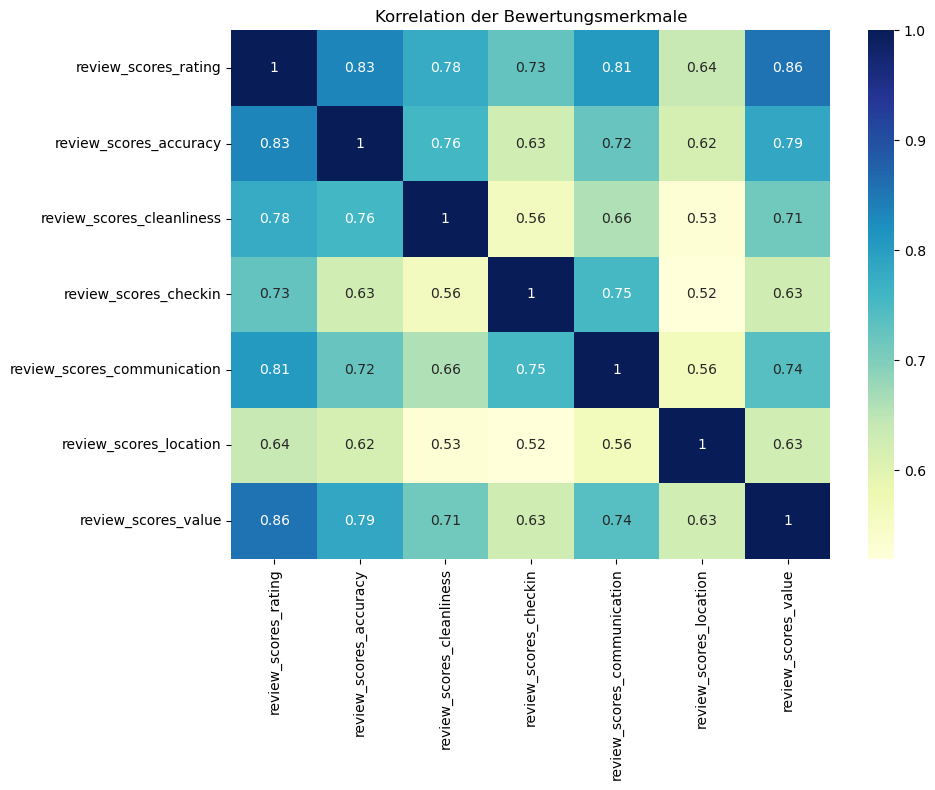

In [52]:
review_cols = [col for col in df.columns if col.startswith("review_scores_")]
plt.figure(figsize=(10, 8))
sns.heatmap(df[review_cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Korrelation der Bewertungsmerkmale")
plt.tight_layout()
plt.show()

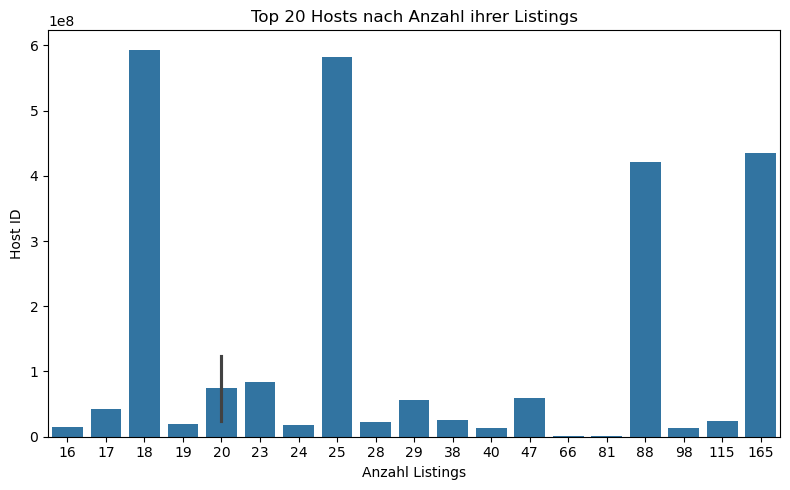

In [53]:
plt.figure(figsize=(8, 5))
top_hosts = df['host_id'].value_counts().nlargest(20)
sns.barplot(x=top_hosts.values, y=top_hosts.index)
plt.title("Top 20 Hosts nach Anzahl ihrer Listings")
plt.xlabel("Anzahl Listings")
plt.ylabel("Host ID")
plt.tight_layout()
plt.show()

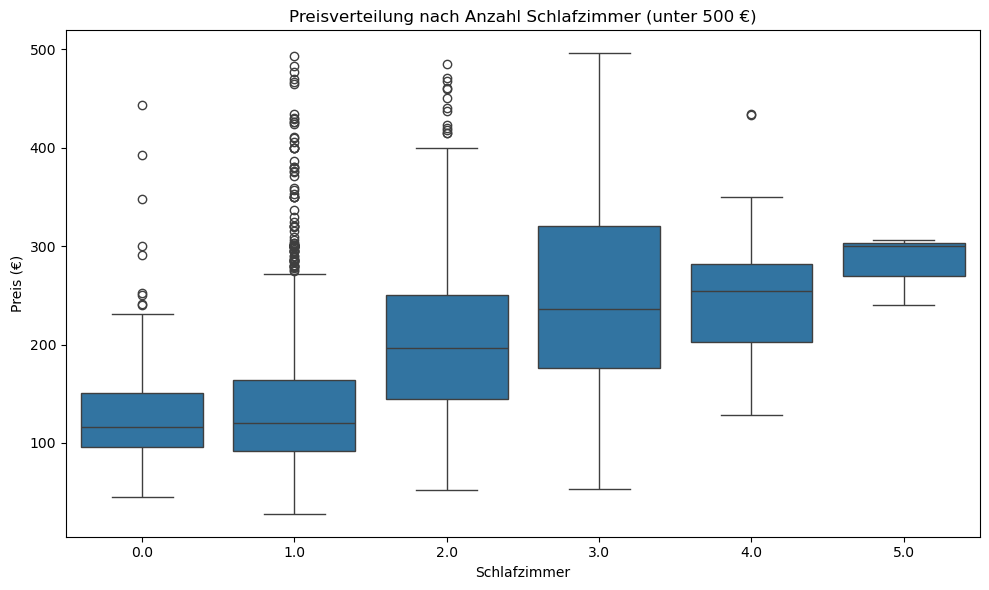

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df["price"] < 500], x="bedrooms", y="price")
plt.title("Preisverteilung nach Anzahl Schlafzimmer (unter 500 €)")
plt.xlabel("Schlafzimmer")
plt.ylabel("Preis (€)")
plt.tight_layout()
plt.show()